In [194]:
import control
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({
    'figure.figsize': (4,4)
})

In [244]:
def nyquist_plot( H, freq_lim=np.pi,a = 2 ):
    w = np.linspace( 0, freq_lim, 2000 )
    z = np.exp( 1j*w )
    thetas =  np.angle( H(z) )
    mods = np.abs( H(z) )
    x = mods * np.cos( thetas )
    y = mods * np.sin( thetas )
    plt.plot( x, y )
    plt.plot( np.cos( w ), np.sin(w), 'k-.' )
    plt.scatter( [-1],[0],s = 100, c='r', marker='x' )
    plt.grid()
    plt.xlim( [-a, a] )
    plt.ylim( [-a, a] )    

In [224]:
z = control.TransferFunction.z
H = lambda w: 1 / ( np.exp( 1j*w ) - 1/2 )

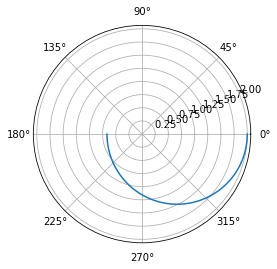

In [225]:
w = np.linspace( 0, np.pi, 2000 )
plt.polar( np.angle(H(w)), np.abs( H(w) ) )

In [226]:
H = lambda w: 0.25 / ( ( np.exp( 1j*w ) - 1 )*( np.exp( 1j*w ) - 1/2 ) )

<ipython-input-226-2333f3c1ac7d>:1: RuntimeWarning: divide by zero encountered in true_divide
  H = lambda w: 0.25 / ( ( np.exp( 1j*w ) - 1 )*( np.exp( 1j*w ) - 1/2 ) )
<ipython-input-226-2333f3c1ac7d>:1: RuntimeWarning: invalid value encountered in true_divide
  H = lambda w: 0.25 / ( ( np.exp( 1j*w ) - 1 )*( np.exp( 1j*w ) - 1/2 ) )


(0.0, 5.0)

/home/lautaro/anaconda3/lib/python3.8/site-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


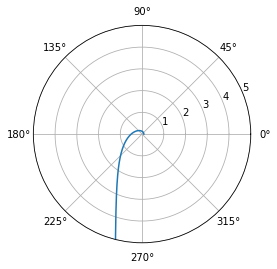

In [227]:
w = np.linspace( 0, np.pi, 2000 )
plt.polar( np.angle(H(w)), np.abs( H(w) ) )
plt.ylim( [0, 5] )

In [228]:
H = lambda z: ( z - 2 ) / ( z + 2 )
w = np.linspace( 0, 2*np.pi, 2000 )

In [229]:
z = np.exp( 1j*w )

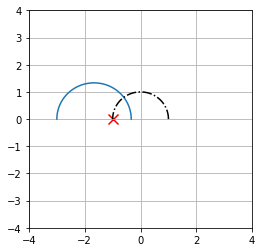

In [230]:
nyquist_plot( H, np.pi )

In [254]:
H = lambda z: K / ( ( z - 2 ) * ( z + 3 ) )
poles = lambda K: np.roots( [1 ,1, K -6] )
K = 6.5
poles(K)

array([-0.5+0.5j, -0.5-0.5j])

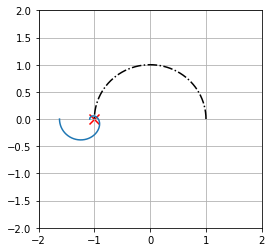

In [255]:
nyquist_plot( H )

In [75]:
H = lambda z: 4 / ( z ** 2 + 2* z - 1 )

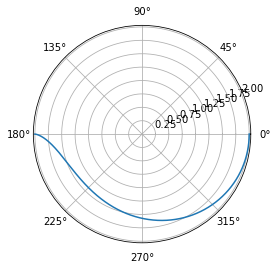

In [82]:
nyquist_plot( H )

In [88]:
p = lambda K: 2 * ( 1 - K ) / ( 1 + K )

In [89]:
K = np.linspace( 0, 5,  2000)

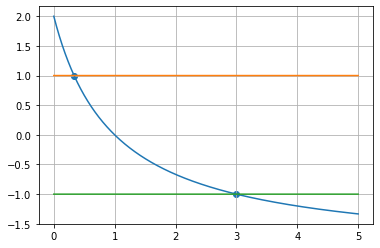

In [94]:
plt.plot( K, p(K) )
plt.plot( K, [1] * len(K) )
plt.plot( K, [-1] * len(K) )
plt.scatter( [1/3, 3], [1, -1] )
plt.grid()